## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how='inner' , on='Mouse ID')
# Display the data table for preview

all_data
# we want to see if there are multiple entries with the same timestamp. if there are, we want to 
# delete all data associated with that mouse. 




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(all_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


mice_for_delete = []
    
all_data['Delete?'] = (all_data['Timepoint'] == all_data['Timepoint'].shift()) & (all_data['Mouse ID'] == all_data['Mouse ID'].shift())
mice_for_delete.append(all_data[all_data['Delete?'] == True])
mice_for_delete[0]['Mouse ID']


for i in mice_for_delete[0]['Mouse ID']:
    all_data.drop(all_data.loc[all_data['Mouse ID'] == i].index, inplace=True)

# all_data
mice_df = all_data.drop(columns=['Delete?'])
mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
len(mice_df['Mouse ID'].unique())

248

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary = mice_df.groupby('Drug Regimen')
tumor_summary_df = tumor_summary.agg(
    {
        "Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std' , 'sem']     
    }
)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

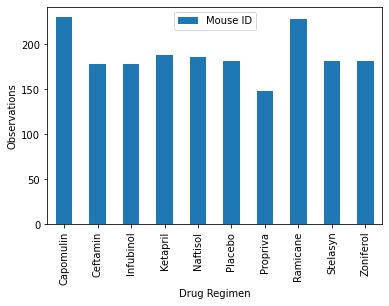

In [6]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_df = mice_df[['Drug Regimen', 'Mouse ID']]
drug_group = drug_df.groupby('Drug Regimen')
drug_group.count().plot(kind='bar')
plt.ylabel('Observations')
plt.show()

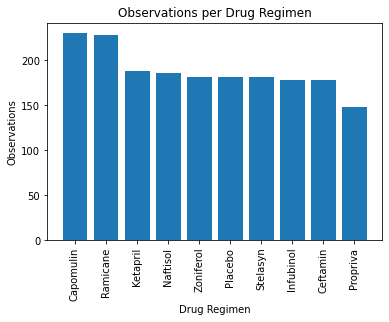

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimens = mice_df['Drug Regimen'].value_counts()
plt.bar(regimens.index, regimens.values)
plt.xticks(rotation=90)
plt.title('Observations per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Observations')
plt.show()


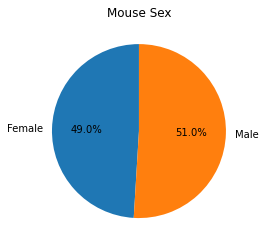

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = mice_df[['Sex', 'Mouse ID']]
sex_group = sex_df.groupby('Sex')
sex_group.count().plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90)
plt.legend().remove()
plt.ylabel('') #removes extranious label
plt.title('Mouse Sex')
plt.show()

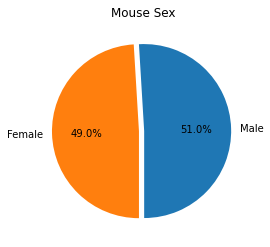

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice = mice_df['Sex'].value_counts()
plt.pie(sex_mice, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=270, explode = [.01,.05])
plt.title('Mouse Sex')
plt.show()



## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_groups = mice_df.groupby('Mouse ID')
ending_timepoints = mouse_groups['Timepoint'].max()

ending_timepoints_df = pd.DataFrame(ending_timepoints)
ending_timepoints_df.reset_index(inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_groups_df = pd.merge(ending_timepoints_df, mice_df, how="inner")

#get only the treatments we are intrested in 
fantastic_four_df = tumor_groups_df[(tumor_groups_df['Drug Regimen'] == 'Capomulin') | (tumor_groups_df['Drug Regimen'] == 'Ramicane') | (tumor_groups_df['Drug Regimen'] == 'Infubinol') | (tumor_groups_df['Drug Regimen'] == 'Ceftamin')]
fantastic_four_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [11]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = fantastic_four_df['Drug Regimen'].unique()


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    #grab data and find IQR
    temp_df = (fantastic_four_df[fantastic_four_df['Drug Regimen'] == treatment])
    temp_values = temp_df['Tumor Volume (mm3)']
    tumor_vol_data.append(temp_values)
    q75, q25 = np.percentile(temp_df['Tumor Volume (mm3)'], [75,25])
    iqr = q75 - q25
    print(f"The IQR for {treatment} is {iqr}")
    
    #determine upper and lower bounds
    lower_bound = q25 - (1.5*iqr)
    upper_bound = q75 + (1.5*iqr)
    print(f'The Lower Bound for {treatment} is {lower_bound}')
    print(f'The Upper Bound for {treatment} is {upper_bound}')
    
    # Determine outliers using upper and lower bounds
    outliers_count = (temp_values.loc[
        (fantastic_four_df['Tumor Volume (mm3)'] >= upper_bound) | 
        (fantastic_four_df['Tumor Volume (mm3)'] <= lower_bound)
    ].count())
    print(f'{treatment} outliers: {outliers_count}')
    print(" ")

The IQR for Infubinol is 11.477135160000003
The Lower Bound for Infubinol is 36.83290494999999
The Upper Bound for Infubinol is 82.74144559000001
Infubinol outliers: 1
 
The IQR for Ceftamin is 15.577752179999997
The Lower Bound for Ceftamin is 25.355449580000002
The Upper Bound for Ceftamin is 87.66645829999999
Ceftamin outliers: 0
 
The IQR for Ramicane is 9.098536719999998
The Lower Bound for Ramicane is 17.912664470000003
The Upper Bound for Ramicane is 54.30681135
Ramicane outliers: 0
 
The IQR for Capomulin is 7.781863460000004
The Lower Bound for Capomulin is 20.70456164999999
The Upper Bound for Capomulin is 51.83201549
Capomulin outliers: 0
 


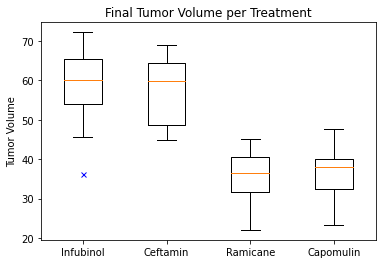

In [12]:
#set the styles for the boxplots
flierprops = dict(marker='x', markerfacecolor='r', markersize=5,
                  linestyle='none', markeredgecolor='b')
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.ylabel('Tumor Volume')
plt.title('Final Tumor Volume per Treatment')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time for Mouse y793 Treated with Capmulin')

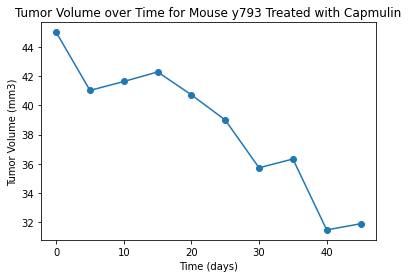

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = mice_df.loc[mice_df['Mouse ID'] == 'y793']

plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker='o')

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time for Mouse y793 Treated with Capmulin')

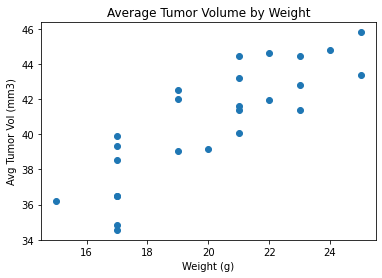

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = mice_df.loc[mice_df['Drug Regimen'] == 'Capomulin']

cap_group_mouse = cap_df.groupby('Mouse ID')
tumor_vol_mean = pd.DataFrame(cap_group_mouse['Tumor Volume (mm3)'].mean())
tumor_vol_mean.reset_index(inplace=True)

tumor_merge = pd.merge(cap_df, tumor_vol_mean, on='Mouse ID')
tumor_merge = tumor_merge.drop_duplicates('Mouse ID')
tumor_merge = tumor_merge.drop(['Tumor Volume (mm3)_x'], axis=1)
tumor_merge.rename(columns={'Tumor Volume (mm3)_y': 'Average Tumor Volume (mm3)'}, inplace=True)

plt.scatter(tumor_merge['Weight (g)'], tumor_merge['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation coefficent for weight and Tumor Volume is 0.84 for Capomulin.



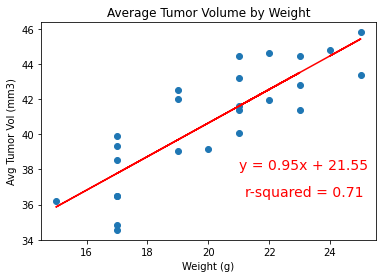

In [76]:
#grabbin the plot from above
plt.scatter(tumor_merge['Weight (g)'], tumor_merge['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')
plt.title('Average Tumor Volume by Weight')


# Calculate the correlation coefficient and linear regression model 
regression = st.linregress(tumor_merge['Weight (g)'], tumor_merge['Average Tumor Volume (mm3)'])
print(f'The correlation coefficent for weight and Tumor Volume is {round(regression.rvalue,2)} for Capomulin.\n')
line = f"y = {round(regression.slope, 2)}x + {round(regression.intercept,2)}"
x = tumor_merge['Weight (g)']
y = tumor_merge['Average Tumor Volume (mm3)']

r2= regression.rvalue * regression.rvalue

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (21,38), fontsize= 14, color="red")
plt.annotate(f'r-squared = {round(r2, 2)}',(21.2, 36.5), fontsize=14, color='red')
plt.show()

# for mouse weight and average tumor volume for the Capomulin regimen
